# BANK MARKETING STRATEGY ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/vinayak-somasekhar/Final-Project-/main/bank.csv'
data_f = pd.read_csv(url,index_col=0)

In [3]:
display(data_f)

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
age,,,,,,,,,,,,,,,,
59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no


In [42]:
data_f=data_f.reset_index()

In [43]:
data_f.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [44]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [45]:
#finding unique values in each column
for col in data_f:
    print(col)
    print(data_f[col].unique())

age
[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
balance
[2343   45 1270 ... 1594 2593 -134]
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration
[1042 1467 1389 ... 1504  818 1812]
campaign
[ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 41 63 27 30 26 23 28 33 31]
pdays
[ -1 166  91 147

In [46]:
#seperating categorical and numerical columns
data_f.dtypes == 'object'

age          False
job           True
marital       True
education     True
default       True
balance      False
housing       True
loan          True
contact       True
day          False
month         True
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
deposit       True
dtype: bool

In [47]:
#seperating numerical and categorical
numerical = data_f.columns[data_f.dtypes != 'object']
categorical = data_f.columns[data_f.dtypes == 'object']

In [48]:
print(numerical)
print(categorical)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')


# Exploratory data Analysis

In [49]:
# find missing values
data_f[numerical]

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


In [50]:
data_f[numerical].isnull().sum() #hence there is no missing values

age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

## Categorical feature exploration

In [51]:
dummy_data = data_f
dummy_data.drop(labels='deposit',axis=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure


In [62]:
categorical_list=[]
numerical_list=[]
for i in dummy_data.columns:
    if dummy_data[i].dtypes=='O':
        categorical_list.append(i)
for i in dummy_data.columns:
    if dummy_data[i].dtypes!='O':
        numerical_list.append(i)
print(categorical_list)
print(numerical_list)
    

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [53]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [54]:
feature_list_length= []
for i in categorical_list:
    feature_list_length.append((i,len(dummy_data[i].unique())))
from tabulate import tabulate
print(tabulate(feature_list_length, headers=['Feature', 'Unique Values']))

Feature      Unique Values
---------  ---------------
job                     12
marital                  3
education                4
default                  2
housing                  2
loan                     2
contact                  3
month                   12
poutcome                 4
deposit                  2


Splitting list based on unique values for better visualization

In [55]:
pie_list=[]
bar_graph_list=[]
for i in categorical_list:
    if len(dummy_data[i].unique())==2:
        pie_list.append(i)
    else:
        bar_graph_list.append(i)
        
print(pie_list)
print(bar_graph_list)

['default', 'housing', 'loan', 'deposit']
['job', 'marital', 'education', 'contact', 'month', 'poutcome']


# Categorical feature distribution

In [56]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [57]:
import plotly.express as px

In [58]:
fig=px.histogram(data_f, x='job', color='job')
fig.show()

fig=px.histogram(data_f, x='contact', color='contact')
fig.show()
fig=px.histogram(data_f, x='marital', color='marital')
fig.show()
fig=px.histogram(data_f, x='education', color='education')
fig.show()
fig=px.histogram(data_f, x='poutcome', color='poutcome')
fig.show()

fig=px.histogram(data_f, x='month', color='month')
fig.show()

In [59]:

fig = px.pie(data_f, values=data_f['housing'].value_counts().values, names=data_f['housing'].value_counts().index,title="Housing Distribution")
fig.show()
fig = px.pie(data_f, values=data_f['loan'].value_counts().values, names=data_f['loan'].value_counts().index,title="Loan Distribution")
fig.show()
fig = px.pie(data_f, values=data_f['default'].value_counts().values, names=data_f['default'].value_counts().index,title="Default Distribution")
fig.show()
fig = px.pie(data_f, values=data_f['deposit'].value_counts().values, names=data_f['deposit'].value_counts().index,title="Deposit Distribution")
fig.show()

Relationship between categorical and dependant variable

<Figure size 1080x5040 with 0 Axes>

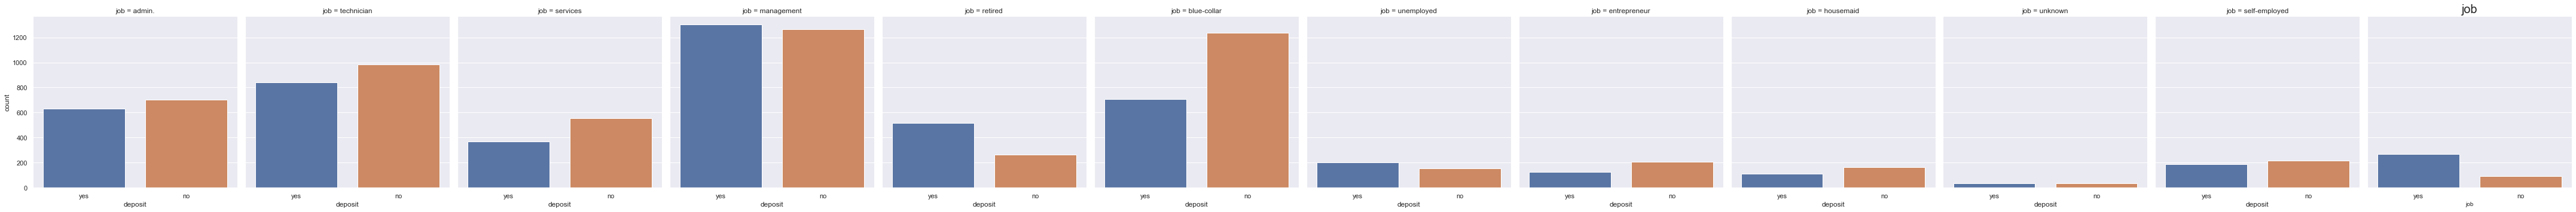

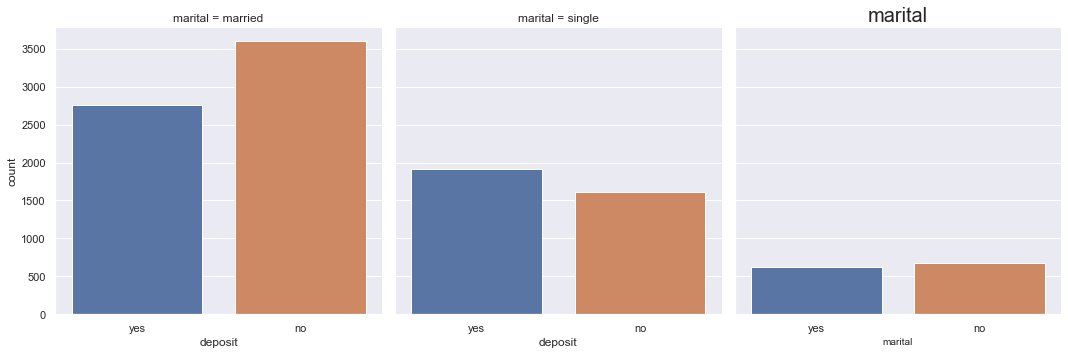

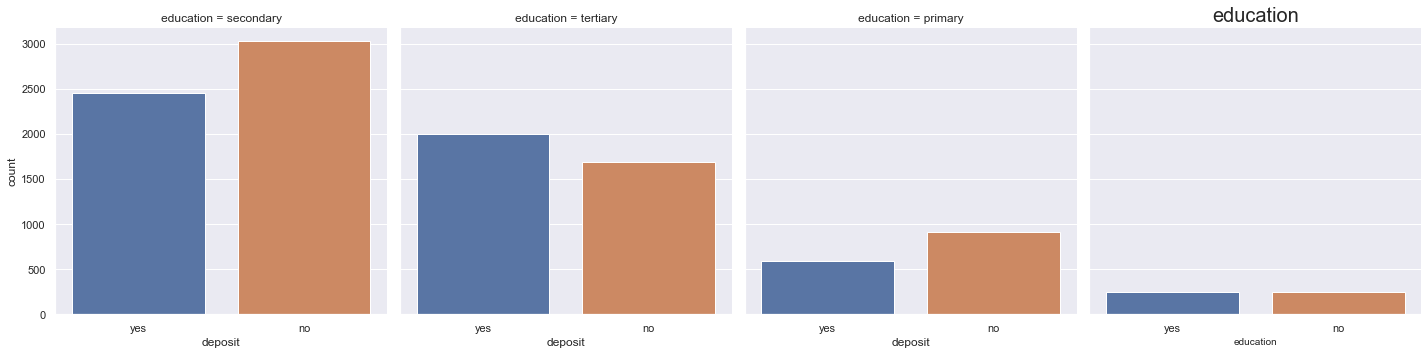

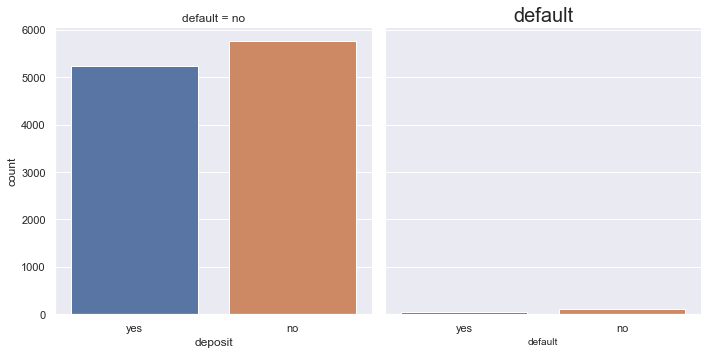

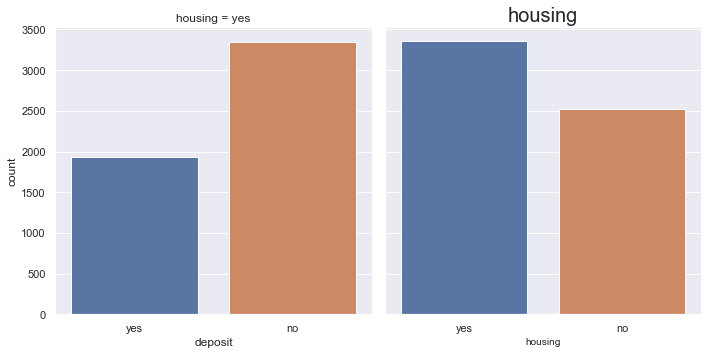

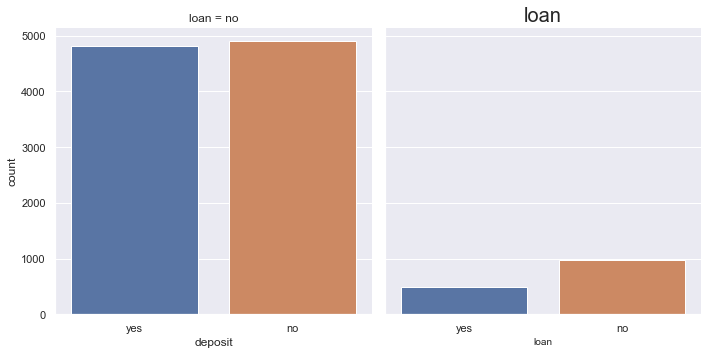

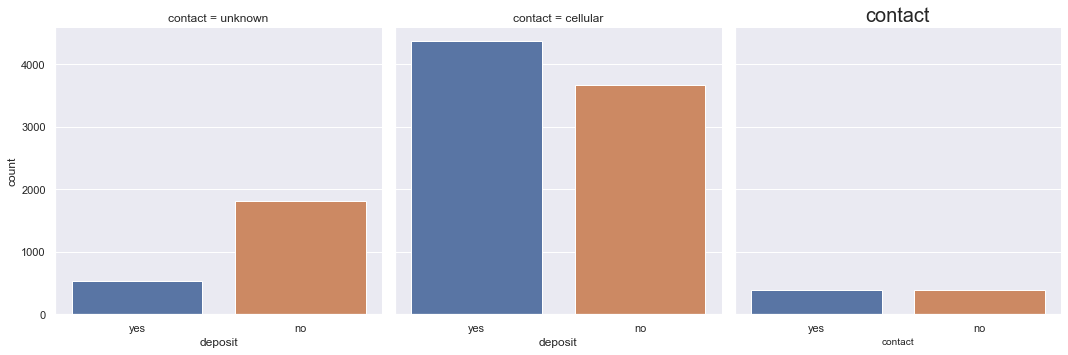

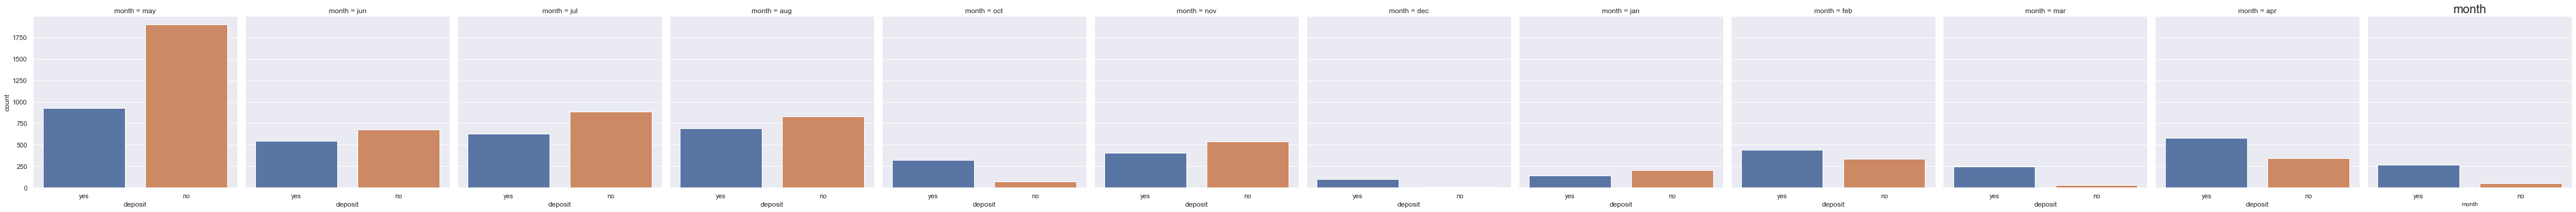

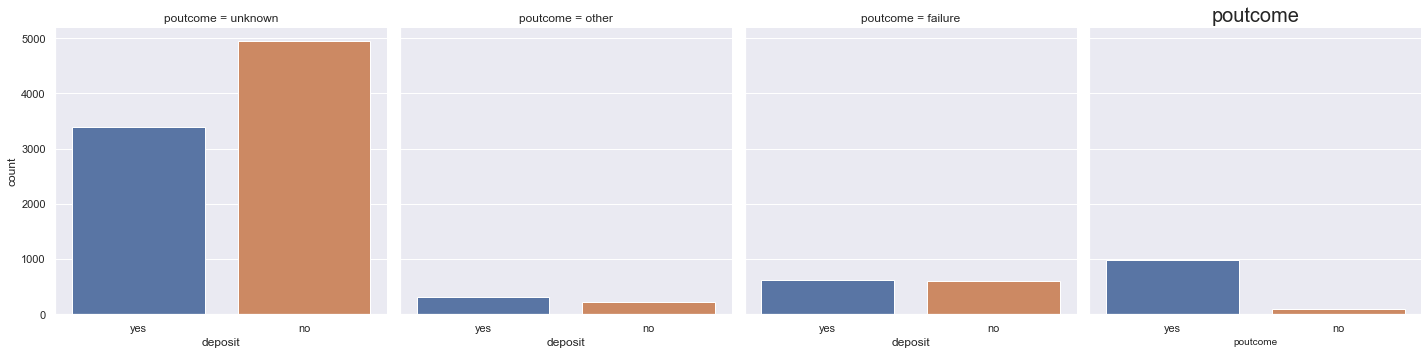

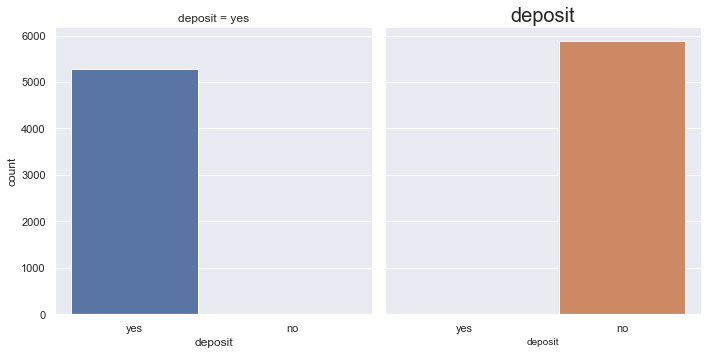

In [60]:
plt.figure(figsize=(15,70), facecolor='grey')
plotnumber = 1
for categorical_list in categorical_list:
    sns.catplot(x='deposit', col=categorical_list, kind='count', data= data_f)
    plt.xlabel(categorical_list,fontsize=10)
    plt.title(categorical_list, fontsize=20)
plt.show()

In [63]:
data_list=[]
for d in categorical_list:
    data_list.append(data_f.groupby(['deposit',d]).size())
print(data_list)


[deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64, deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64, deposit  education
no       pr

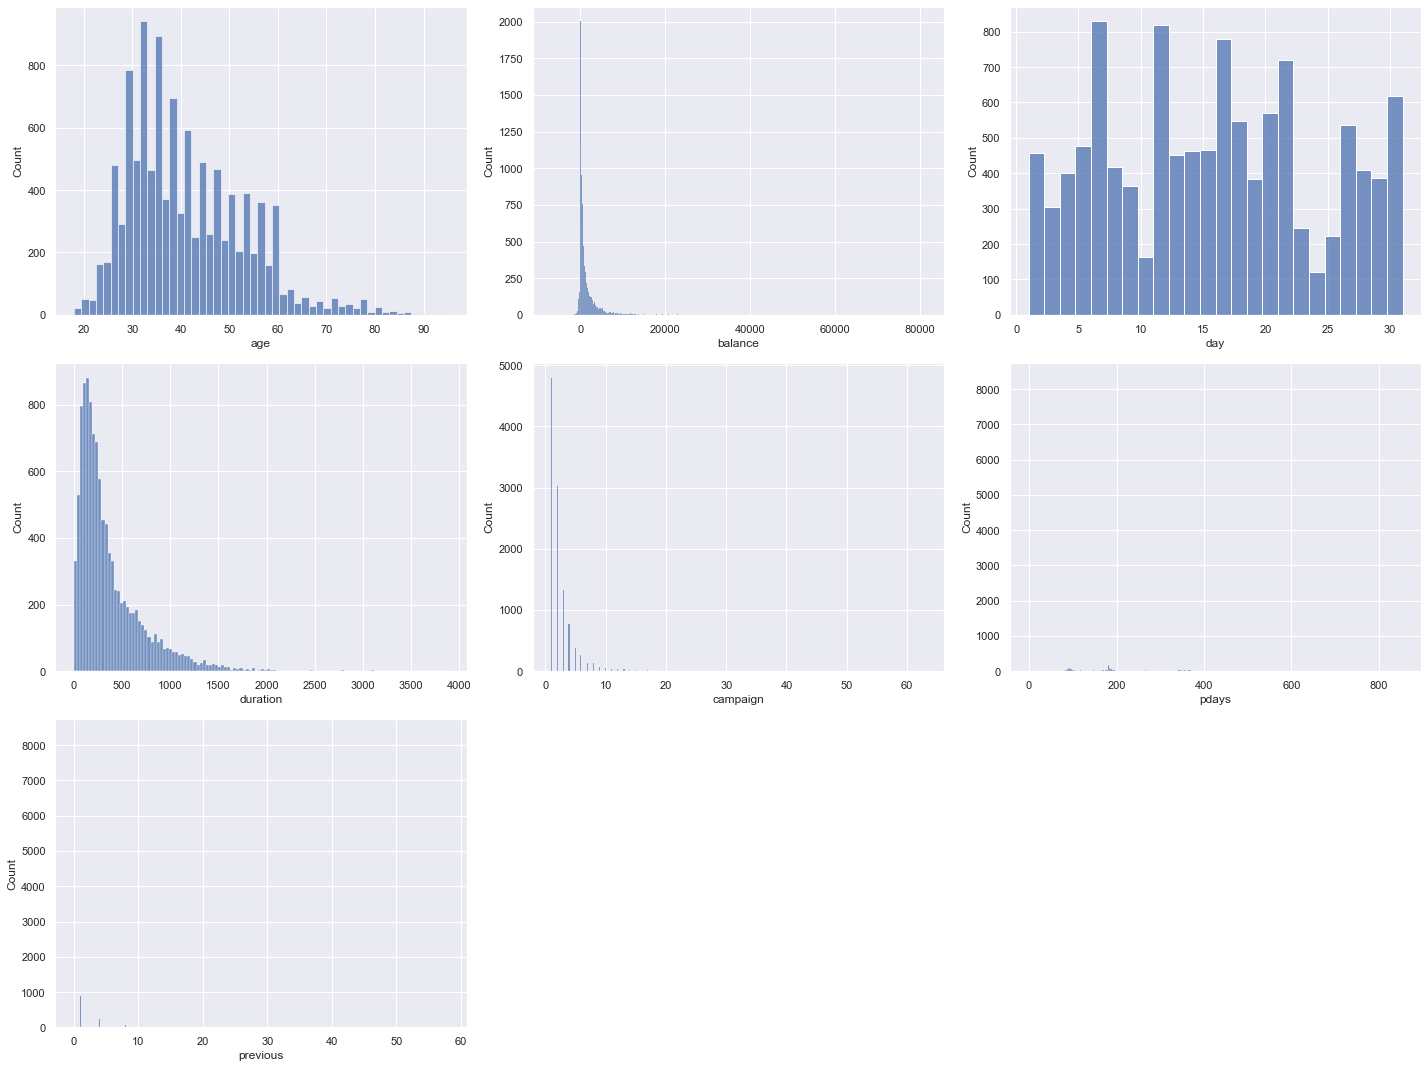

In [64]:
#Histograms for understanding Distributions

for j,i in enumerate(data_f.select_dtypes(include=['float64','int64']).columns):
    plt.subplot(3,3,j+1)
    sns.set(rc={'figure.figsize':(20,15)})
    sns.histplot(data_f[i])
    plt.tight_layout()
    

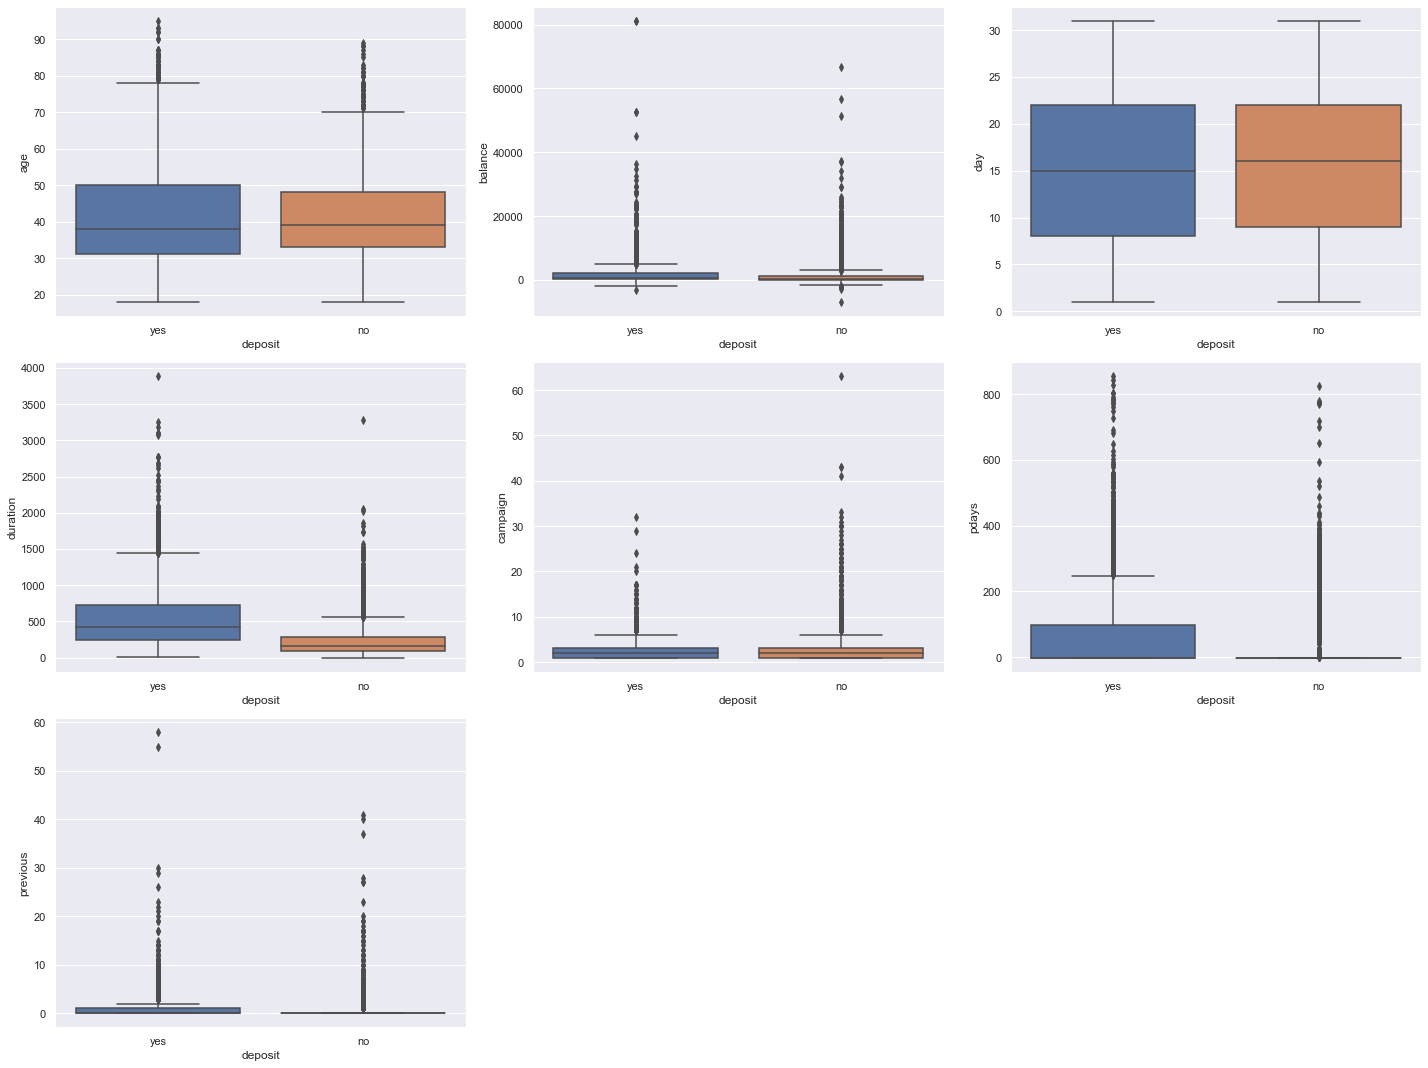

In [65]:
#Implementing box plots for all numerical variables

for j,i in enumerate(data_f.select_dtypes(include=['float64','int64']).columns):
    plt.subplot(3,3,j+1)
    sns.set(rc={'figure.figsize':(20,15)})
    sns.boxplot(x="deposit", y=i, data=data_f)
    plt.tight_layout()
    

In [66]:
data_f.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Distribution of categorical Variables

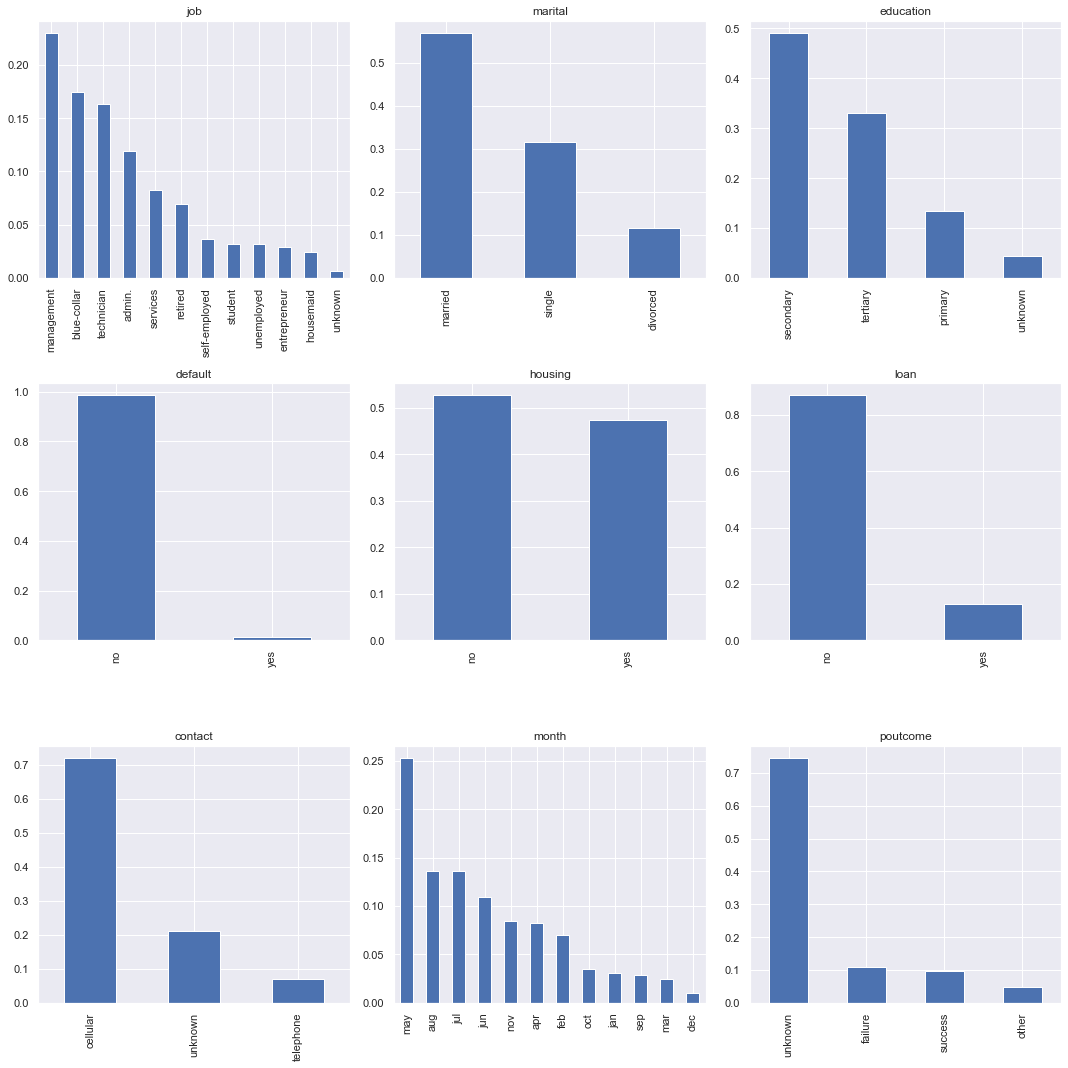

In [68]:
for j,i in enumerate(data_f.select_dtypes(include=['object']).columns):
    if i=='deposit':
        break
    plt.subplot(3,3,j+1)
    data_f[i].value_counts(normalize=True).plot.bar(figsize=(15,15),title=i)
    plt.tight_layout()

# Correlation matrix

<AxesSubplot:>

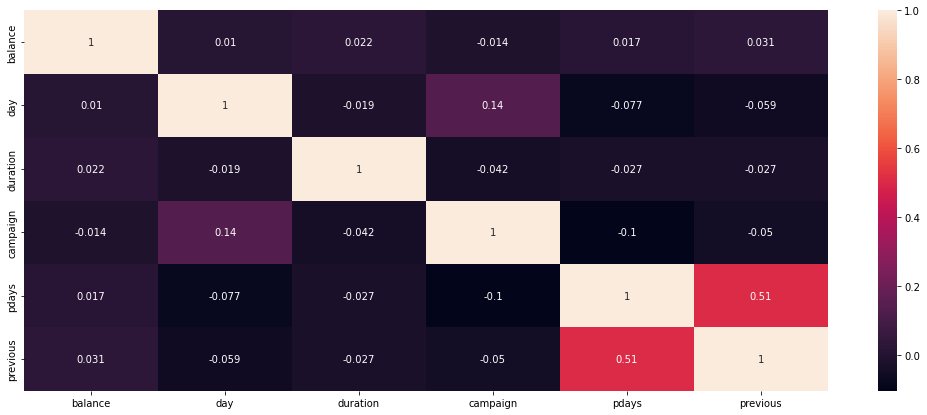

In [40]:
correlation_matrix=data_f.corr()
fig = plt.figure(figsize=(18,7))
sns.heatmap(correlation_matrix,annot=True)

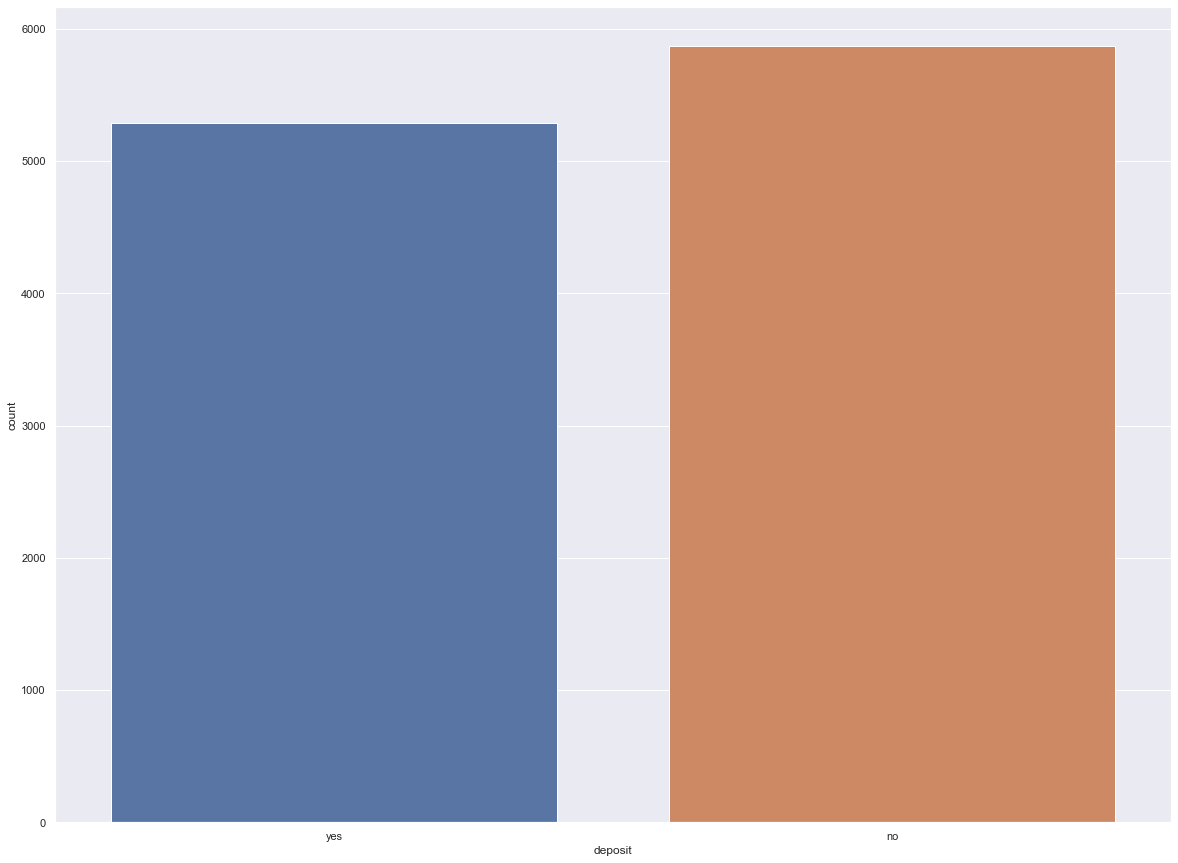

In [67]:
sns.countplot(x='deposit',data=data_f)
plt.show()

# Feature Extraction

In [172]:
data_f2=data_f.copy()

In [173]:
data_f2= data_f2.reset_index()
data_f2

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


Removing Outliers and drop unsignificant Values

In [174]:
# Default no is having a greater value here. hence deafult is an unsignificant column for analysis.
data_f2.groupby(['deposit','default']).size().reset_index().rename(columns={0:'Count'})

,deposit,default,Count
0,no,no,5757
1,no,yes,116
2,yes,no,5237
3,yes,yes,52


In [175]:
#Dropping default as it is not significant.
data_f2.drop(['default'],axis=1, inplace=True)

In [176]:
data_f2.groupby(['deposit','pdays']).size().reset_index().rename(columns={0:'Count'})

,deposit,pdays,Count
0,no,-1,4940
1,no,1,2
2,no,2,6
3,no,5,2
4,no,6,2
...,...,...,...
727,yes,804,1
728,yes,805,1
729,yes,828,1
730,yes,842,1


In [177]:
# Dropping pdays column as -1 have a greater value which is not significant for the analysis
data_f2.drop(['pdays'],axis=1, inplace=True)

In [148]:
#Due to the ambigious nature of the column 'duration', it is advised to discard this particular attribute for realistic prediction. 
data_f2.groupby(['deposit','duration']).size().reset_index().rename(columns={0:'Count'})

,deposit,duration,Count
0,no,2,1
1,no,3,1
2,no,4,2
3,no,5,4
4,no,6,6
...,...,...,...
2152,yes,3094,1
2153,yes,3102,1
2154,yes,3183,1
2155,yes,3253,1


In [178]:
# Dropping duration column as it is not significant for the analysis
data_f2.drop(['duration'],axis=1, inplace=True)

Removing outliers in age

In [179]:
data_f2.groupby(['deposit','age']).agg({'age':'count'})
# Here the age lies between 18 and 95, which is significant to our analysis.

age
deposit age     
no      18     1
        19     2
        20     5
        21     8
        22     8
...          ...
yes     87     3
        90     2
        92     2
        93     2
        95     1

[144 rows x 1 columns]

Removing outliers in balance

In [180]:
data_f2.groupby(['deposit','balance']).agg({'balance':'count'})
# As balance goes high, client show interest on deposit, hence the outliers cannot be removed

balance
deposit balance         
no      -6847          1
        -2712          1
        -2282          1
        -2049          1
        -1965          1
...                  ...
yes      34646         1
         36252         1
         45248         1
         52587         2
         81204         2

[5082 rows x 1 columns]

In [182]:
# remove outliers in feature campaign...
data_f2.groupby(['deposit','campaign']).agg({'campaign':'count'})

campaign
deposit campaign          
no      1             2237
        2             1627
        3              703
        4              454
        5              239
        6              173
        7               92
        8               96
        9               51
        10              38
        11              24
        12              25
        13              24
        14              11
        15               9
        16               7
        17               8
        18               8
        19               5
        20               4
        21               7
        22               4
        23               3
        24               4
        25               3
        26               3
        27               1
        28               1
        29               1
        30               4
        31               1
        32               1
        33               1
        41               1
        43               2
        63               1
yes     1             2561
        2             1401
        3              618
        4              317
        5              139
        6               92
        7               47
        8               32
        9               21
        10              14
        11              16
        12               4
        13               6
        14               4
        15               4
        16               2
        17               6
        20               1
        21               1
        24               1
        29               1
        32               1

Here we are assuming campaign count greater than 30 are as outliers.

In [183]:

data_f3 = data_f2[data_f2['campaign'] < 32]

In [184]:
data_f3.groupby(['deposit','campaign']).agg({'campaign':'count'})

campaign
deposit campaign          
no      1             2237
        2             1627
        3              703
        4              454
        5              239
        6              173
        7               92
        8               96
        9               51
        10              38
        11              24
        12              25
        13              24
        14              11
        15               9
        16               7
        17               8
        18               8
        19               5
        20               4
        21               7
        22               4
        23               3
        24               4
        25               3
        26               3
        27               1
        28               1
        29               1
        30               4
        31               1
yes     1             2561
        2             1401
        3              618
        4              317
        5              139
        6               92
        7               47
        8               32
        9               21
        10              14
        11              16
        12               4
        13               6
        14               4
        15               4
        16               2
        17               6
        20               1
        21               1
        24               1
        29               1

Removing outliers in the column previous

In [185]:

data_f3.groupby(['deposit','previous']).agg({'previous':'count'})

previous
deposit previous          
no      0             4934
        1              304
        2              237
        3              141
        4               73
        5               44
        6               34
        7               23
        8               21
        9               10
        10               4
        11               8
        12               6
        13               2
        14               1
        15               4
        16               2
        17               8
        18               1
        19               2
        20               1
        23               1
        27               2
        28               1
        37               1
        40               1
        41               1
yes     0             3383
        1              583
        2              456
        3              294
        4              171
        5              121
        6               83
        7               54
        8               39
        9               24
        10              26
        11              15
        12              10
        13               9
        14               5
        15               1
        17               3
        19               2
        20               1
        21               1
        22               1
        23               1
        26               1
        29               1
        30               1
        55               1
        58               1

In [188]:
data_f4 = data_f3[data_f3['previous'] < 30]

handling categorical attributes

In [189]:
categorical_att = ['marital', 'job', 'education', 'month', 'contact', 'poutcome']
for col in  categorical_att :
    data_f4 = pd.concat([data_f4.drop(col, axis=1),pd.get_dummies(data_f4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

Handling Boolean attribues

In [190]:
boolean_att = ['housing', 'loan', 'deposit']
for col in  boolean_att:
    data_f4[col+'_updated']=data_f4[col].apply(lambda x : 1 if x == 'yes' else 0)
    data_f4.drop(col, axis=1, inplace=True)

In [191]:
data_f4.head()

,index,age,balance,day,campaign,previous,marital_married,marital_single,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,housing_updated,loan_updated,deposit_updated
0,0,59,2343,5,1,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,1
1,1,56,45,5,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,2,41,1270,5,1,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,1
3,3,55,2476,5,1,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,1
4,4,54,184,5,2,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


Splitting data into Test and training data. Here we are splitting the data into 30:70 ratio

In [200]:
data_f4=data_f4.drop(['index'],axis=1)

In [234]:
X = data_f4.drop(['deposit_updated'],axis=1)
y = data_f4['deposit_updated']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)

In [235]:
X_train

,age,balance,day,campaign,previous,marital_married,marital_single,job_blue-collar,job_entrepreneur,job_housemaid,...,month_nov,month_oct,month_sep,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,housing_updated,loan_updated
2149,30,983,27,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6840,28,458,4,4,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7027,42,478,8,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1420,36,1822,8,1,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
7503,37,4798,20,2,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9383,32,1212,23,2,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
7300,28,154,20,9,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
1344,44,1058,11,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7302,34,897,12,4,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# Implementing ML Models for Classification

1. Logistic Regression

In [236]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

In [237]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [238]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=LogisticRegression(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.67456758 0.69122357 0.68225496 0.67777066 0.67884615]
0.6809325875917803


In [239]:
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
score=accuracy_score(pred,y_test)

In [240]:
print('confusion_matrix',confusion_matrix(pred,y_test))
print('recall',recall_score(pred,y_test))
print('precision',precision_score(pred,y_test))
print('f1_score',f1_score(pred,y_test))

confusion_matrix [[1259  611]
 [ 471 1004]]
recall 0.680677966101695
precision 0.621671826625387
f1_score 0.6498381877022654


2. Random Forest classifier

In [241]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [256]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.72325432 0.71492633 0.72581678 0.7264574  0.71474359]
0.7210396852773535


In [257]:
model1=RandomForestClassifier(random_state=1)
model1.fit(X_train,y_train)
pred1=model1.predict(X_test)
score1=accuracy_score(pred1,y_test)

In [258]:
print('confusion_matrix',confusion_matrix(pred1,y_test))
print('recall',recall_score(pred1,y_test))
print('precision',precision_score(pred1,y_test))
print('f1_score',f1_score(pred1,y_test))

confusion_matrix [[1371  590]
 [ 359 1025]]
recall 0.740606936416185
precision 0.6346749226006192
f1_score 0.6835611870623541


3. XGB Classifier

In [259]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.70787956 0.70852018 0.72069186 0.72325432 0.70448718]
0.7129666223163982


In [260]:
model2=XGBClassifier(random_state=1)
model2.fit(X_train,y_train)
pred2=model2.predict(X_test)
score2=accuracy_score(pred2,y_test)

In [261]:
print('confusion_matrix',confusion_matrix(pred2,y_test))
print('recall',recall_score(pred2,y_test))
print('precision',precision_score(pred2,y_test))
print('f1_score',f1_score(pred2,y_test))

confusion_matrix [[1365  584]
 [ 365 1031]]
recall 0.7385386819484241
precision 0.638390092879257
f1_score 0.684822318166722


In [262]:
!pip install xgboost

Creating parameters

In [264]:

model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [15, 60, 120, 150],
            'criterion': ['gini'],
            'max_depth': range(2, 4, 1),
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [6, 7, 15, 25],
            'n_estimators': [15, 60, 120, 150]
        }
    }
}

Grid Search

In [265]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })  

In [267]:
pd.set_option('display.max_columns', None)
best_model_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best_model_df

,model,best_score,best_params
0,RandomForestClassifier,0.667773,"{'criterion': 'gini', 'max_depth': 3, 'max_fea..."
1,XGBClassifier,0.693339,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti..."


In [268]:
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [269]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [270]:
model_xgb.score(X_test,y_test)

0.7139013452914799

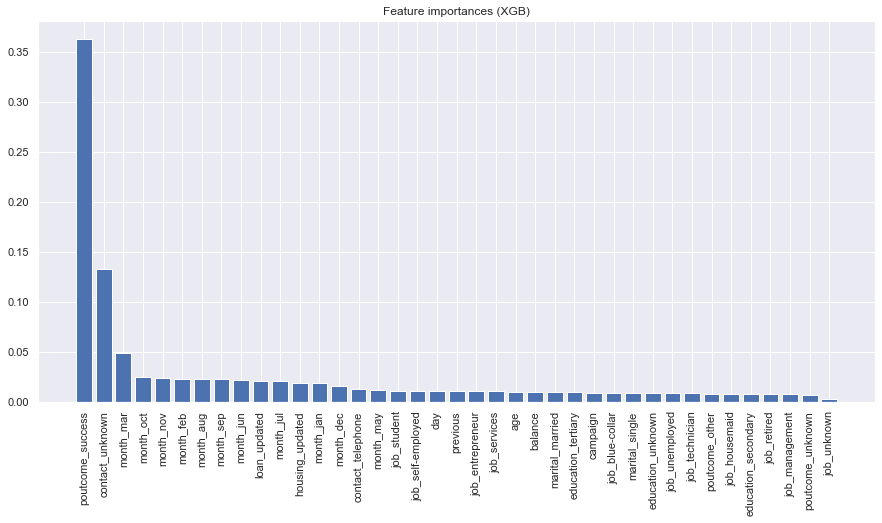

In [271]:
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

In [272]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[1376,  354],
       [ 603, 1012]], dtype=int64)